# DATA612
### PROJECT 2 :Content-Based and Collaborative Filtering
### Ananya

# content  based recommnedation system 
   Content based recomendation system first step is to exatct important feature from the data set and merge them
   to create a bag o words and calculate doc-tfidf score. 
   calculate the cosine similarity to find similar movie based on it's content.
   Then recommend top similar product to user. 



In [272]:
# importing required library 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [273]:
# reading data set 
ds1 = pd.read_csv(r"datasets-imdb-1000.csv")
ds1.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [257]:
# inforamation about the data 
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [274]:
# size of data 
ds1.size

12000

In [275]:
ds1.shape

(1000, 12)

In [276]:
# spliting data into test train split 
train = ds1.sample(frac=0.8, random_state=200)
test = ds1.drop(train.index)


In [277]:
train.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
674,675,War on Everyone,"Action,Comedy",Two corrupt cops set out to blackmail and fram...,John Michael McDonagh,"Alexander Skarsgård, Michael Peña, Theo James,...",2016,98,5.9,9285,NaN,50.0
233,234,Mission: Impossible - Rogue Nation,"Action,Adventure,Thriller",Ethan and team take on their most impossible m...,Christopher McQuarrie,"Tom Cruise, Rebecca Ferguson, Jeremy Renner, S...",2015,131,7.4,257472,195.00,75.0
739,740,The Mummy: Tomb of the Dragon Emperor,"Action,Adventure,Fantasy","In the Far East, Alex O'Connell, the son of fa...",Rob Cohen,"Brendan Fraser, Jet Li, Maria Bello, Michelle ...",2008,112,5.2,124554,102.18,31.0
865,866,Horns,"Drama,Fantasy,Horror",In the aftermath of his girlfriend's mysteriou...,Alexandre Aja,"Daniel Radcliffe, Juno Temple, Max Minghella, ...",2013,120,6.5,61060,0.16,46.0
523,524,Whiskey Tango Foxtrot,"Biography,Comedy,Drama",A journalist recounts her wartime coverage in ...,Glenn Ficarra,"Tina Fey, Margot Robbie, Martin Freeman, Alfre...",2016,112,6.6,36156,NaN,NaN


In [278]:
train.size

9600

In [279]:
train.shape

(800, 12)

In [280]:
test.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0


In [265]:
test.size

2400

### only considering required  5 attribute to create a content profile 

In [291]:
df_train = train[['Title','Genre','Director','Actors','Description']]
df_train.head()

,Title,Genre,Director,Actors,Description
674,War on Everyone,"Action,Comedy",John Michael McDonagh,"Alexander Skarsgård, Michael Peña, Theo James,...",Two corrupt cops set out to blackmail and fram...
233,Mission: Impossible - Rogue Nation,"Action,Adventure,Thriller",Christopher McQuarrie,"Tom Cruise, Rebecca Ferguson, Jeremy Renner, S...",Ethan and team take on their most impossible m...
739,The Mummy: Tomb of the Dragon Emperor,"Action,Adventure,Fantasy",Rob Cohen,"Brendan Fraser, Jet Li, Maria Bello, Michelle ...","In the Far East, Alex O'Connell, the son of fa..."
865,Horns,"Drama,Fantasy,Horror",Alexandre Aja,"Daniel Radcliffe, Juno Temple, Max Minghella, ...",In the aftermath of his girlfriend's mysteriou...
523,Whiskey Tango Foxtrot,"Biography,Comedy,Drama",Glenn Ficarra,"Tina Fey, Margot Robbie, Martin Freeman, Alfre...",A journalist recounts her wartime coverage in ...


In [292]:
df_train.shape

(800, 5)

In [293]:
# discarding the commas between the actors' full names and getting only the first three names
df_train['Actors'] = df_train['Actors'].map(lambda x: x.split(',')[:3])

# creating geners a list 
df_train['Genre'] = df_train['Genre'].map(lambda x: x.lower().split(','))

df_train['Director'] = df_train['Director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director 
for index, row in df_train.iterrows():
    row['Actors'] = [x.lower().replace(' ','') for x in row['Actors']]
    row['Director'] = ''.join(row['Director']).lower()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [294]:
df_train

,Title,Genre,Director,Actors,Description
674,War on Everyone,"[action, comedy]",johnmichaelmcdonagh,"[alexanderskarsgård, michaelpeña, theojames]",Two corrupt cops set out to blackmail and fram...
233,Mission: Impossible - Rogue Nation,"[action, adventure, thriller]",christophermcquarrie,"[tomcruise, rebeccaferguson, jeremyrenner]",Ethan and team take on their most impossible m...
739,The Mummy: Tomb of the Dragon Emperor,"[action, adventure, fantasy]",robcohen,"[brendanfraser, jetli, mariabello]","In the Far East, Alex O'Connell, the son of fa..."
865,Horns,"[drama, fantasy, horror]",alexandreaja,"[danielradcliffe, junotemple, maxminghella]",In the aftermath of his girlfriend's mysteriou...
523,Whiskey Tango Foxtrot,"[biography, comedy, drama]",glennficarra,"[tinafey, margotrobbie, martinfreeman]",A journalist recounts her wartime coverage in ...
...,...,...,...,...,...
766,Ender's Game,"[action, sci-fi]",gavinhood,"[harrisonford, asabutterfield, haileesteinfeld]",Young Ender Wiggin is recruited by the Interna...
414,Mechanic: Resurrection,"[action, adventure, crime]",dennisgansel,"[jasonstatham, jessicaalba, tommyleejones]",Arthur Bishop thought he had put his murderous...
728,The A-Team,"[action, adventure, comedy]",joecarnahan,"[liamneeson, bradleycooper, sharltocopley]",A group of Iraq War veterans looks to clear th...
947,King Cobra,"[crime, drama]",justinkelly,"[garrettclayton, christianslater, mollyringwald]",This ripped-from-the-headlines drama covers th...


### Removing stop word from the description and creating bag of words with required information 

In [295]:
stop = text.ENGLISH_STOP_WORDS
df_train['Description'] = df_train['Description'].str.lower().str.split()
df_train['Description'] = df_train['Description'].apply(lambda x: [item for item in x if item not in stop])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### changed  description colum removing stop word and creating list of important words 

In [287]:
df_train

,Title,Genre,Director,Actors,Description
674,War on Everyone,"[action, comedy]",johnmichaelmcdonagh,"[alexanderskarsgård, michaelpeña, theojames]","[corrupt, cops, set, blackmail, frame, crimina..."
233,Mission: Impossible - Rogue Nation,"[action, adventure, thriller]",christophermcquarrie,"[tomcruise, rebeccaferguson, jeremyrenner]","[ethan, team, impossible, mission, yet,, eradi..."
739,The Mummy: Tomb of the Dragon Emperor,"[action, adventure, fantasy]",robcohen,"[brendanfraser, jetli, mariabello]","[far, east,, alex, o'connell,, son, famed, mum..."
865,Horns,"[drama, fantasy, horror]",alexandreaja,"[danielradcliffe, junotemple, maxminghella]","[aftermath, girlfriend's, mysterious, death,, ..."
523,Whiskey Tango Foxtrot,"[biography, comedy, drama]",glennficarra,"[tinafey, margotrobbie, martinfreeman]","[journalist, recounts, wartime, coverage, afgh..."
...,...,...,...,...,...
766,Ender's Game,"[action, sci-fi]",gavinhood,"[harrisonford, asabutterfield, haileesteinfeld]","[young, ender, wiggin, recruited, internationa..."
414,Mechanic: Resurrection,"[action, adventure, crime]",dennisgansel,"[jasonstatham, jessicaalba, tommyleejones]","[arthur, bishop, thought, murderous, past, him..."
728,The A-Team,"[action, adventure, comedy]",joecarnahan,"[liamneeson, bradleycooper, sharltocopley]","[group, iraq, war, veterans, looks, clear, u.s..."
947,King Cobra,"[crime, drama]",justinkelly,"[garrettclayton, christianslater, mollyringwald]","[ripped-from-the-headlines, drama, covers, ear..."


In [296]:
# createing new index as Title 
df_train.set_index('Title', inplace = True)
df_train.head()

,Genre,Director,Actors,Description
Title,,,,
War on Everyone,"[action, comedy]",johnmichaelmcdonagh,"[alexanderskarsgård, michaelpeña, theojames]","[corrupt, cops, set, blackmail, frame, crimina..."
Mission: Impossible - Rogue Nation,"[action, adventure, thriller]",christophermcquarrie,"[tomcruise, rebeccaferguson, jeremyrenner]","[ethan, team, impossible, mission, yet,, eradi..."
The Mummy: Tomb of the Dragon Emperor,"[action, adventure, fantasy]",robcohen,"[brendanfraser, jetli, mariabello]","[far, east,, alex, o'connell,, son, famed, mum..."
Horns,"[drama, fantasy, horror]",alexandreaja,"[danielradcliffe, junotemple, maxminghella]","[aftermath, girlfriend's, mysterious, death,, ..."
Whiskey Tango Foxtrot,"[biography, comedy, drama]",glennficarra,"[tinafey, margotrobbie, martinfreeman]","[journalist, recounts, wartime, coverage, afgh..."


### creating bag of words which contains all relivent information of a movie 

In [297]:
df_train['bag_of_words'] = ''
columns = df_train.columns
for index, row in df_train.iterrows():
    words = ''
    for col in columns:
        if col != 'Director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
df_train.drop(columns = [col for col in df_train.columns if col!= 'bag_of_words'], inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [298]:
df_train.shape


(800, 1)

In [299]:
df_train

,bag_of_words
Title,
War on Everyone,action comedy johnmichaelmcdonagh alexanderska...
Mission: Impossible - Rogue Nation,action adventure thriller christophermcquarrie...
The Mummy: Tomb of the Dragon Emperor,action adventure fantasy robcohen brendanfrase...
Horns,drama fantasy horror alexandreaja danielradcli...
Whiskey Tango Foxtrot,biography comedy drama glennficarra tinafey ma...
...,...
Ender's Game,action sci-fi gavinhood harrisonford asabutter...
Mechanic: Resurrection,action adventure crime dennisgansel jasonstath...
The A-Team,action adventure comedy joecarnahan liamneeson...


### Applying tfidf to creating item profile matrix 

In [300]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['bag_of_words'])

In [163]:
tfidf_matrix

<1000x45276 sparse matrix of type '<class 'numpy.float64'>'
	with 62525 stored elements in Compressed Sparse Row format>

### applying cosine similarity to find which item are most similar and close to each other 

In [301]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim 

array([[1.        , 0.01533889, 0.        , ..., 0.        , 0.00277161,
        0.        ],
       [0.01533889, 1.        , 0.        , ..., 0.        , 0.00261331,
        0.0075326 ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00277161, 0.00261331, 0.        , ..., 0.        , 1.        ,
        0.00284218],
       [0.        , 0.0075326 , 0.        , ..., 0.        , 0.00284218,
        1.        ]])

### Creating a heat map of  correlation matrix which is square and is symmetric, so plotting all values would be redundant 

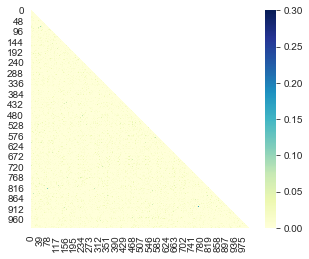

In [321]:
mask = np.zeros_like(cosine_sim)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(cosine_sim, mask=mask, vmax=.3, square=True,  cmap="YlGnBu")
    plt.show()

In [302]:
# creation of indices 
indices_movie = pd.Series(df_train.index)
indices_movie[:5]

0                          War on Everyone
1       Mission: Impossible - Rogue Nation
2    The Mummy: Tomb of the Dragon Emperor
3                                    Horns
4                    Whiskey Tango Foxtrot
Name: Title, dtype: object

### defining the function that takes in movie title  as input and returns the top 10 recommended movies

In [311]:

#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations(input, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended movies
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices_movie[indices_movie == input].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df.index)[i])
        
    return recommended_movies

###   Recomend similar movie for War on Everyone

In [312]:
recommendations('War on Everyone')

['Slither',
 'I Am Number Four',
 'Jupiter Ascending',
 'Fantastic Four',
 'Battleship',
 'G.I. Joe: Retaliation',
 'Green Lantern',
 'Predators',
 'Godzilla',
 'Jurassic World']

### we can see here Recomendation engine is predicting movie correctly as 
### War on Everyone is a action movie and similar movie it will recomends are also action movie 
### so over here we are getting expected result 

In [304]:
df.loc['War on Everyone'] 

bag_of_words    action comedy johnmichaelmcdonagh alexanderska...
Name: War on Everyone, dtype: object

In [217]:
df.loc['Guardians of the Galaxy'] 

bag_of_words    action adventure sci-fi jamesgunn chrispratt v...
Name: Guardians of the Galaxy, dtype: object

In [253]:

df.loc['Fantastic Four'] 

bag_of_words    action adventure sci-fi joshtrank milesteller ...
Name: Fantastic Four, dtype: object

In [305]:
df.loc['Jurassic World']

bag_of_words    action adventure sci-fi colintrevorrow chrispr...
Name: Jurassic World, dtype: object

In [306]:
df.loc['Predators']

bag_of_words    action adventure sci-fi nimródantal adrienbrod...
Name: Predators, dtype: object

### Movie Horns also predicting similar movie 

In [314]:
recommendations('Horns')

['Ratatouille',
 'Enchanted',
 'Happy Feet',
 'Hotel Transylvania 2',
 'The Imaginarium of Doctor Parnassus',
 'Scouts Guide to the Zombie Apocalypse',
 'Zootopia',
 'Ted 2',
 'Ted',
 'A Million Ways to Die in the West']

In [315]:
df.loc['Horns']

bag_of_words    drama fantasy horror alexandreaja danielradcli...
Name: Horns, dtype: object

In [316]:
df.loc['Enchanted']

bag_of_words    animation comedy family kevinlima amyadams sus...
Name: Enchanted, dtype: object

In [317]:
df.loc['Ratatouille']

bag_of_words    animation comedy family bradbird bradgarrett l...
Name: Ratatouille, dtype: object

# SUMMARY 

### ADVANTAGES 

1. content based recommendation system is a Robost mechanism as we donot need other user 
2. It helps to recommendation with unique taste
3. Able to recoomend new and popular item 

### Challanges 

1. Difficult to create item profile such and extract feature from movie and images 
2. Some user very unpredictable and have multiple interest 

As a whole we can see above content based recomendation is predicting as expected.


